In [2]:
import os
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from tqdm import tqdm
from urllib.parse import unquote
import lxml

In [3]:
def verify(element):
    if element is None:
        return True
    if element.get('href') is None:
        return True
    if element.get('href')[-7:-4] == 'jpg' or element.get('href')[-7:-4] == 'png':
        return True
    return False

def links_name(link):
    link_name = ''
    if link.text != '':
        if link.get('title') != None:
            link_name = link.get('title')
        else: 
            link_name = link.text
    return link_name

def link_par_position(page, link):
    par_occurences = np.array(0)
    for i in range(globals()['count_%s'%page.replace(' ', '_')]):
        if link in globals()['infobox_%s'%(page.replace(' ', '_'))]:
            par_occurences = 0
            break
        if link in globals()['par_%s_%s'%(page.replace(' ', '_'), i)]:
            par_occurences = i
    return par_occurences

def search_link(path_link, article_links):
    index = article_links.index(path_link)    
    return index

def link_clicked(path_dataframe, links_dataframe):
    link_numbers = []
    for links in tqdm(path_dataframe['path']):
        if len(links) <2:
            continue
        names = []
        links = links.split(";")
        links_def = [x.replace('_', ' ') for x in links]
        if '<' in links_def:
            continue #
        for i in range(len(links_def)-1):   
            names = list(links_dataframe.loc[links_dataframe['pagename'] == links_def[i].replace(' ', '_'), 'link'])
            try:
                index = search_link(unquote(links_def[i+1]), names[0])
            except ValueError:
                continue #check this later
            link_numbers.append(index)
    return link_numbers


In [14]:
directory = r'..\..\data\wikispeedia_articles_html\wpcd\wp'
link_DF = pd.DataFrame(columns = ['pagename', 'link ', 'number'])


for filename in tqdm(os.listdir(directory)):
    f = os.path.join(directory, filename)
    for filename_2 in os.listdir(f):
        g = os.path.join(f, filename_2)

        print(g)
        pagename = g.split("/")[5]
        print(pagename)
        if pagename.split('.')[1] == 'jpg':
            continue
        pagename = pagename[:-4]
        
        with open(g, 'rb') as fp:
            soup = BeautifulSoup(fp, 'lxml', from_encoding="utf-8")

        count = 0
        counts = []
        pagenames = []
        link_name = []
        for link in soup.find_all('a'):  
            if verify(link):
                continue 

            if link.text != '':
                if link.get('title') != None:
                    link_name.append(link.get('title'))
                else: 
                    link_name.append(link.text)
            counts.append(count)
            pagenames.append(pagename)
            count+=1
        df_list = pd.DataFrame([[pagename, link_name, count]], columns = ['pagename', 'link', 'number'])
        link_DF = pd.concat([link_DF, df_list], ignore_index=True)
        


        

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: '..\\..\\data\\wikispeedia_articles_html\\wpcd\\wp'

In [1]:
directory1 = r"..\data\wikispeedia_paths-and-graph\wikispeedia_paths-and-graph\paths_finished.csv"
directory2 = r"..\data\project\wikispeedia_paths-and-graph\wikispeedia_paths-and-graph\paths_unfinished.csv"
path_finished = pd.read_csv(directory1, sep = ';', encoding="iso-8859-1")
path_unfinished = pd.read_csv(directory2, sep = ';')


NameError: name 'pd' is not defined

In [136]:
#Finished paths link clicked  number

link_numbers_f = link_clicked(path_finished, link_DF)
link_numbers_u = link_clicked(path_unfinished, link_DF)
'''
for links in tqdm(path_finished['path']):

    names = []
    links = links.split(";")
    links_def = [x.replace('_', ' ') for x in links]
    if '<' in links_def:
        continue


    for i in range(len(links_def)-1):   
        names = list(link_DF.loc[link_DF['pagename'] == links_def[i].replace(' ', '_'), 'link'])
        try:
            index = search_link(unquote(links_def[i+1]), names[0])
        except ValueError:
            continue #check this later
        link_numbers_f.append(index)
'''


100%|██████████| 24875/24875 [01:32<00:00, 268.73it/s]


'\nfor links in tqdm(path_finished[\'path\']):\n\n    names = []\n    links = links.split(";")\n    links_def = [x.replace(\'_\', \' \') for x in links]\n    if \'<\' in links_def:\n        continue\n\n\n    for i in range(len(links_def)-1):   \n        names = list(link_DF.loc[link_DF[\'pagename\'] == links_def[i].replace(\' \', \'_\'), \'link\'])\n        try:\n            index = search_link(unquote(links_def[i+1]), names[0])\n        except ValueError:\n            continue #check this later\n        link_numbers_f.append(index)\n'

statistics path finished count    195717.000000
mean         29.162234
std          40.799066
min           1.000000
25%           6.000000
50%          15.000000
75%          34.000000
max         464.000000
dtype: float64
statistics path unfinished count    53076.000000
mean        25.526113
std         36.811907
min          1.000000
25%          5.000000
50%         13.000000
75%         30.000000
max        396.000000
dtype: float64


(array([   0.,  187., 3927., 3520., 3090., 2656., 2582., 2109., 1859.,
        1558., 1510., 1717., 1475., 1265., 1198., 1138., 1167.,  952.,
         754., 1491.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

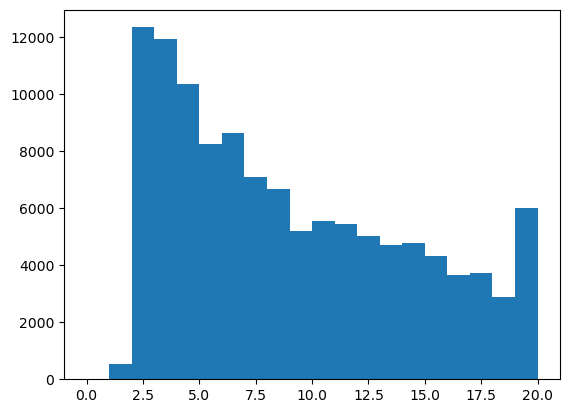

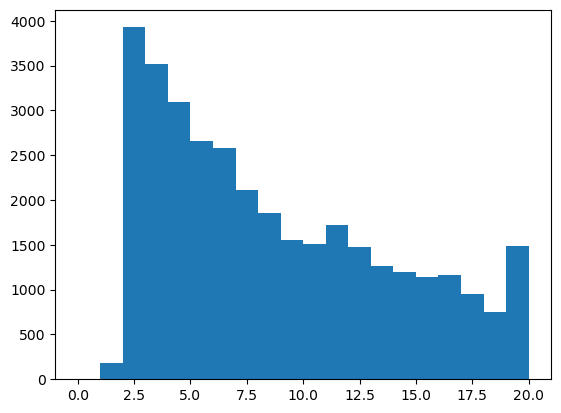

In [143]:
y = pd.Series(link_numbers_f).describe()
z = pd.Series(link_numbers_u).describe()

print('statistics path finished', y)

print('statistics path unfinished', z)

test_f = [x for x in link_numbers_f if x<20]
test_u = [x for x in link_numbers_u if x<20]

plt.figure()
plt.hist(link_numbers_f, bins = np.arange(21))

plt.figure()
plt.hist(link_numbers_u, bins = np.arange(21))

#plt.hist(link_numbers[:i], bins = np.arange(max(link_DF['number'])))    

# Statistics of clicked links:
    - number of links

##

In [123]:
z

count    195780.000000
mean         29.156696
std          40.794048
min           1.000000
25%           6.000000
50%          15.000000
75%          34.000000
max         464.000000
dtype: float64